In [2]:
import numpy as np
import pandas as pd
from os import listdir
from os.path import isfile, join
from keras.layers import Dense, Dropout, Activation, Flatten , Conv2D, MaxPool2D
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import os
from skimage.io import imread
from skimage.transform import resize
import numpy as np

# Define categories and arrays to store data
class_names = ['Cloudy', 'Sunny', 'Rainy', 'Snowy', 'Foggy']
data1_arr = []  # Input array
target_arr = []  # Output array

# Path containing all the categories of images
datadir = '/content/drive/MyDrive/344-331/RomeWeather'

# Load images and assign target labels
for category in class_names:
    print(f'Loading category: {category}')
    category_path = os.path.join(datadir, category)

    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)
        img_array = imread(img_path)
        img_resized = resize(img_array, (150, 150, 3))
        data1_arr.append(img_resized.flatten())
        target_arr.append(class_names.index(category))



# Convert lists to NumPy arrays
data1 = np.array(data1_arr)
target = np.array(target_arr)



Loading category: Cloudy
Loading category: Sunny
Loading category: Rainy
Loading category: Snowy
Loading category: Foggy


In [5]:
# Create DataFrame
df = pd.DataFrame(data1)
df['Target'] = target

#input data
x=df.iloc[:,:-1]

#output data
y=df.iloc[:,-1]
df.shape

(250, 67501)

1.Model ann

In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Step 1: Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Step 2: Define the ANN model
ann_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, activation='relu', solver='adam', random_state=42)

# Step 3: Train the ANN model
ann_model.fit(x_train, y_train)

# Step 4: Evaluate the model
y_pred_ann = ann_model.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_ann)
print("Accuracy:", accuracy)

# Print classification report for more detailed evaluation
print("Classification Report for ANN:")
print(classification_report(y_test, y_pred_ann, target_names=class_names))



Accuracy: 0.28
Classification Report for ANN:
              precision    recall  f1-score   support

      Cloudy       0.27      1.00      0.43        13
       Sunny       0.00      0.00      0.00         7
       Rainy       0.50      0.10      0.17        10
       Snowy       0.00      0.00      0.00        11
       Foggy       0.00      0.00      0.00         9

    accuracy                           0.28        50
   macro avg       0.15      0.22      0.12        50
weighted avg       0.17      0.28      0.14        50



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


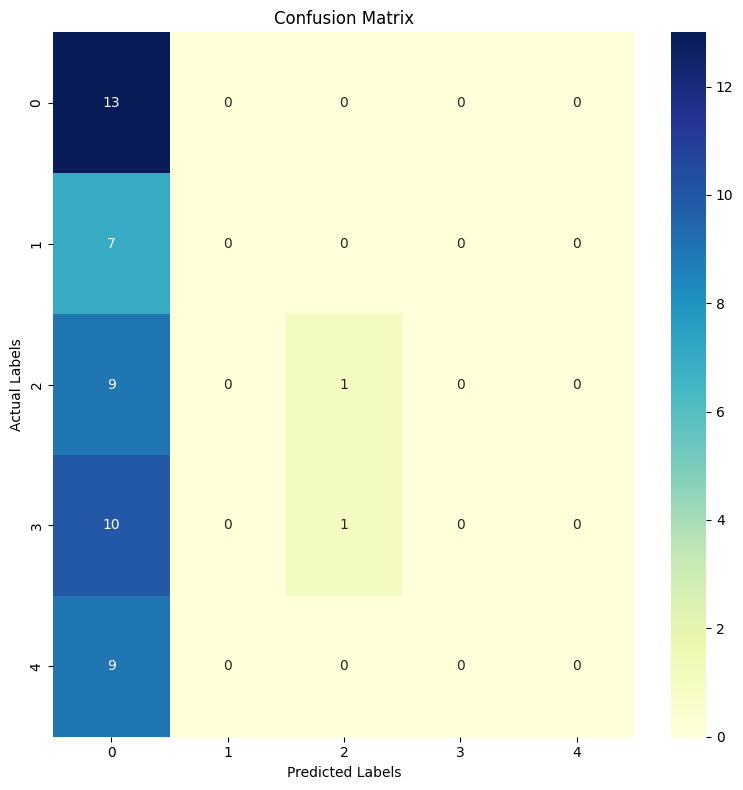

In [7]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred_ann are available
cm = confusion_matrix(y_test, y_pred_ann)

# Reduce figure size
plt.rcParams['figure.figsize'] = (8, 8)  # Adjust as needed

# Create heatmap
ax = sns.heatmap(cm, annot=True, cmap="YlGnBu")

# Set labels and title
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("Actual Labels")
ax.set_title("Confusion Matrix")

plt.tight_layout()
plt.show()


In [8]:
# Compute the accuracy
from sklearn.metrics import accuracy_score
print("%.2f" % (accuracy_score(y_test, y_pred_ann)*100))

28.00


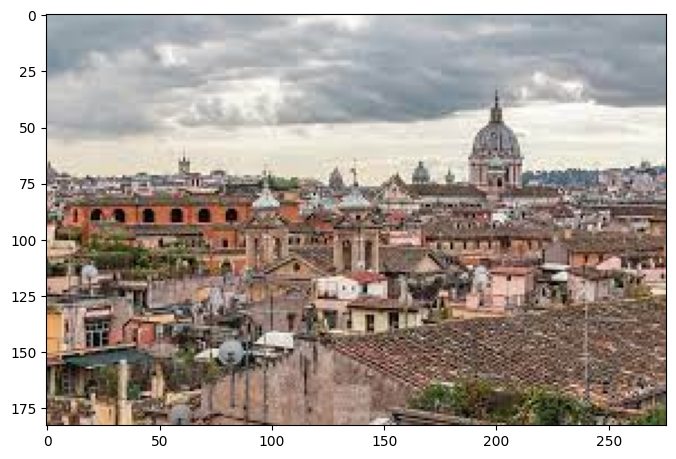

Cloudy = 99.92836910460153%
Sunny = 1.0622566086062866e-12%
Rainy = 0.07163089376440337%
Snowy = 2.727940524390241e-14%
Foggy = 1.6329825968144392e-09%
Predicted weather class : Cloudy


In [9]:
import os
from skimage.io import imread
import matplotlib.pyplot as plt
from skimage.transform import resize
import joblib

# Load the saved model
#model_filename = 'svm_model2.pkl'
#joblib.dump(svm_model, model_filename)
#print("Model saved as", model_filename)

# Define the path to the image
path = os.path.join('/content/drive/MyDrive/344-331/RomeWeather/Cloudy/download (2).jpg')

# Read the image
img = imread(path)

# Display the image
plt.imshow(img)
plt.show()

# Resize the image
img_resize = resize(img, (150, 150, 3))

# Flatten and reshape the resized image
img_flatten = img_resize.flatten()
img_flatten = img_flatten.reshape(1, -1)  # Reshape to match the expected input shape of the model

# Predict probabilities for each class
probability = ann_model.predict_proba(img_flatten)

# Predict the class
predicted_class = ann_model.predict(img_flatten)

# Print the probabilities for each class
for ind, val in enumerate(class_names):
    print(f'{val} = {probability[0][ind]*100}%')

# Print the predicted class
print("Predicted weather class : " + class_names[predicted_class[0]])

In [10]:
from sklearn.model_selection import cross_val_score
# Assuming X_train, y_train are your training data and labels
scores = cross_val_score(ann_model, x_train, y_train, cv=5)

# Print the mean and standard deviation of the scores
print("Mean cross-validation score: {:.2f}".format(np.mean(scores)))
print("Standard deviation of cross-validation score: {:.2f}".format(np.std(scores)))

Mean cross-validation score: 0.28
Standard deviation of cross-validation score: 0.06


2.model svm

In [11]:
from sklearn.svm import SVC
from sklearn import svm

# Step 1: Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Step 2: Define the SVM model
svm_model = SVC(probability=True)  # Radial Basis Function (RBF) kernel with default parameters

# Step 3: Train the SVM model
svm_model.fit(x_train,y_train)

# Testing the model using the testing data
y_pred = svm_model.predict(x_test)

# Calculating the accuracy of the model
accuracy = accuracy_score(y_pred, y_test)
print("Accuracy:", accuracy)

# Print classification report for more detailed evaluation
print("Classification Report for SVM:")
print(classification_report(y_test, y_pred, target_names=class_names))



Accuracy: 0.62
Classification Report for SVM:
              precision    recall  f1-score   support

      Cloudy       0.62      0.38      0.48        13
       Sunny       0.71      0.71      0.71         7
       Rainy       0.41      0.70      0.52        10
       Snowy       0.78      0.64      0.70        11
       Foggy       0.78      0.78      0.78         9

    accuracy                           0.62        50
   macro avg       0.66      0.64      0.64        50
weighted avg       0.66      0.62      0.62        50



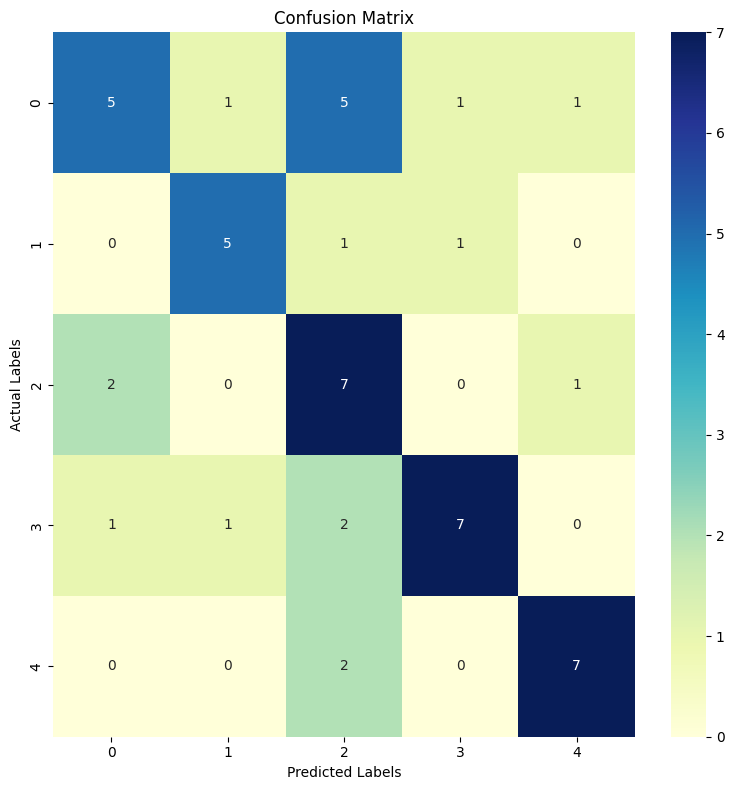

In [12]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred_ann are available
cm = confusion_matrix(y_test, y_pred)

# Reduce figure size
plt.rcParams['figure.figsize'] = (8, 8)  # Adjust as needed

# Create heatmap
ax = sns.heatmap(cm, annot=True, cmap="YlGnBu")

# Set labels and title
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("Actual Labels")
ax.set_title("Confusion Matrix")

plt.tight_layout()
plt.show()


In [13]:
# Compute the accuracy
from sklearn.metrics import accuracy_score
print("%.2f" % (accuracy_score(y_test, y_pred)*100))

62.00


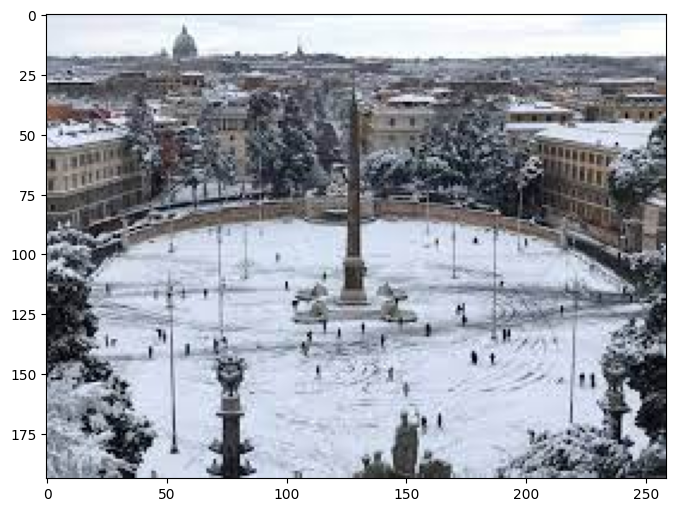

Cloudy = 0.68975156225093%
Sunny = 1.0653352776859735%
Rainy = 2.0367768711615897%
Snowy = 95.66540163361205%
Foggy = 0.5427346552894402%
Predicted weather class : Snowy


In [14]:
import os
from skimage.io import imread
import matplotlib.pyplot as plt
from skimage.transform import resize
import joblib

# Load the saved model
#model_filename = 'svm_model2.pkl'
#joblib.dump(svm_model, model_filename)
#print("Model saved as", model_filename)

# Define the path to the image
path = os.path.join('/content/drive/MyDrive/344-331/RomeWeather/Snowy/download (16).jpg')

# Read the image
img = imread(path)

# Display the image
plt.imshow(img)
plt.show()

# Resize the image
img_resize = resize(img, (150, 150, 3))

# Flatten and reshape the resized image
img_flatten = img_resize.flatten()
img_flatten = img_flatten.reshape(1, -1)  # Reshape to match the expected input shape of the model

# Predict probabilities for each class
probability = svm_model.predict_proba(img_flatten)

# Predict the class
predicted_class = svm_model.predict(img_flatten)

# Print the probabilities for each class
for ind, val in enumerate(class_names):
    print(f'{val} = {probability[0][ind]*100}%')

# Print the predicted class
print("Predicted weather class : " + class_names[predicted_class[0]])

โมเดล SVM ข้างต้นเป็นการฝึกอบรมล่วงหน้าเพื่อจำแนกสภาพอากาศจากรูปภาพ โดยเเบ่งเป็น 5 class และทำการ Predicted ว่าอยู่ใน class ใด จากรูปข้างต้น จัดอยู่ใน class : snowy มีความแม่นยำประมาณ 96.2%

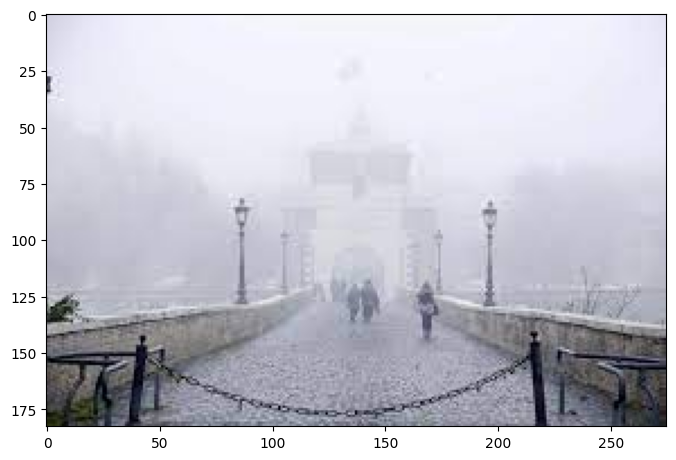

Cloudy = 2.6950436915091878%
Sunny = 1.438493057479158%
Rainy = 2.6343417740643544%
Snowy = 1.9369811741981064%
Foggy = 91.29514030274916%
Predicted weather class : Foggy


In [15]:
import os
from skimage.io import imread
import matplotlib.pyplot as plt
from skimage.transform import resize
import joblib

# Load the saved model
#model_filename = 'svm_model2.pkl'
#joblib.dump(svm_model, model_filename)
#print("Model saved as", model_filename)

# Define the path to the image
path = os.path.join('/content/drive/MyDrive/344-331/RomeWeather/Foggy/download (12).jpg')

# Read the image
img = imread(path)

# Display the image
plt.imshow(img)
plt.show()

# Resize the image
img_resize = resize(img, (150, 150, 3))

# Flatten and reshape the resized image
img_flatten = img_resize.flatten()
img_flatten = img_flatten.reshape(1, -1)  # Reshape to match the expected input shape of the model

# Predict probabilities for each class
probability = svm_model.predict_proba(img_flatten)

# Predict the class
predicted_class = svm_model.predict(img_flatten)

# Print the probabilities for each class
for ind, val in enumerate(class_names):
    print(f'{val} = {probability[0][ind]*100}%')

# Print the predicted class
print("Predicted weather class : " + class_names[predicted_class[0]])

โมเดล SVM ข้างต้นเป็นการฝึกอบรมล่วงหน้าเพื่อจำแนกสภาพอากาศจากรูปภาพ โดยเเบ่งเป็น 5 class และทำการ Predicted ว่าอยู่ใน class ใด จากรูปข้างต้น จัดอยู่ใน class : foggy มีความแม่นยำประมาณ 92.1%

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn import svm

# Define candidate kernels and regularization parameters
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
C = [0.01, 0.1, 1, 10]

for k in kernels:
    for c in C:
        model = svm.SVC(kernel=k, C=c)
        cvs = cross_val_score(model, x_train, y_train, cv=5)
        print(cvs.mean().round(4), end=' ')
    print('\n')

0.635 0.635 0.62 0.62 

0.215 0.225 0.67 0.675 

0.555 0.65 0.64 0.635 

0.215 0.215 0.215 0.16 



Deploy

In [21]:
from sklearn import svm

model = SVC( probability=True)

model.fit(x_train, y_train)

SVC(probability=True)

In [22]:
import pickle

# Assuming model is your trained SVM model
svm_model = svm.SVC(kernel='poly', probability=True)
svm_model.fit(x_train, y_train)

# Save the model to a file
model_filename = "svm_model.pickle"
with open(model_filename, 'wb') as model_file:
    pickle.dump(svm_model, model_file)

In [23]:
import pickle

# Load the model from the file
model_filename = "svm_model.pickle"
with open(model_filename, 'rb') as model_file:
    loaded_model = pickle.load(model_file)

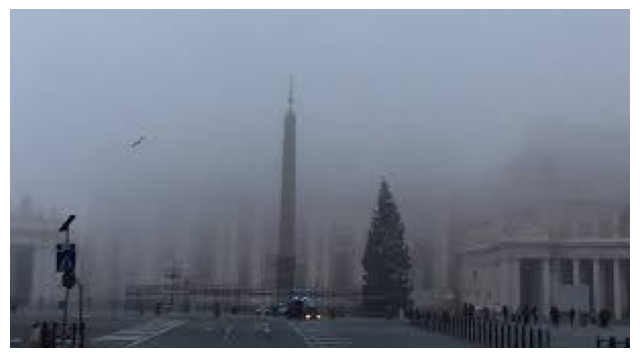

Cloudy = 30.89%
Sunny = 10.21%
Rainy = 19.26%
Snowy = 2.18%
Foggy = 37.46%
The predicted image is : Foggy


In [29]:
import random
# Path to the folder containing test images
test_folder_path = "/content/drive/MyDrive/344-331/RomeWeather"

# List all subfolders in the test folder
subfolders = [f.path for f in os.scandir(test_folder_path) if f.is_dir()]

# Select a random subfolder
random_folder_path = random.choice(subfolders)

# List all files in the random subfolder
file_list = os.listdir(random_folder_path)

# Select a random file from the list
random_file = random.choice(file_list)

# Define the path to the randomly selected image
path = os.path.join(random_folder_path, random_file)

plt.figure(figsize=(8, 8))
img = imread(path)
plt.imshow(img)
plt.axis('off')
plt.show()

# Resize and flatten the image for prediction
img_resize = resize(img, (150, 150, 3))
l = [img_resize.flatten()]

# Predict the class probabilities and the predicted class
probability = svm_model.predict_proba(l)
Categories = ['Cloudy', 'Sunny', 'Rainy', 'Snowy', 'Foggy']
for ind, val in enumerate(Categories):
    print(f'{val} = {probability[0][ind]*100:.2f}%')
predicted_class = Categories[svm_model.predict(l)[0]]
print("The predicted image is : " + predicted_class)